## Imports

In [1]:
import hypertools as hyp
import numpy as np
import pandas as pd
from os.path import join as opj
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Set paths & params

In [2]:
traj_dir = '../../data/trajectories/'
fig_dir = '../../figures/'

plt.rcParams['pdf.fonttype'] = 42
sns.set_context('paper')
cmap = 'rocket'

## Load data

In [3]:
ff_lec = np.load(opj(traj_dir, 'forces_lecture.npy'))
bos_lec = np.load(opj(traj_dir, 'bos_lecture.npy'))
ff_qs = np.load(opj(traj_dir, 'forces_questions.npy'))
bos_qs = np.load(opj(traj_dir, 'bos_questions.npy'))
# all_qs = np.load(opj(traj_dir, 'all_questions.p'), allow_pickle=True)

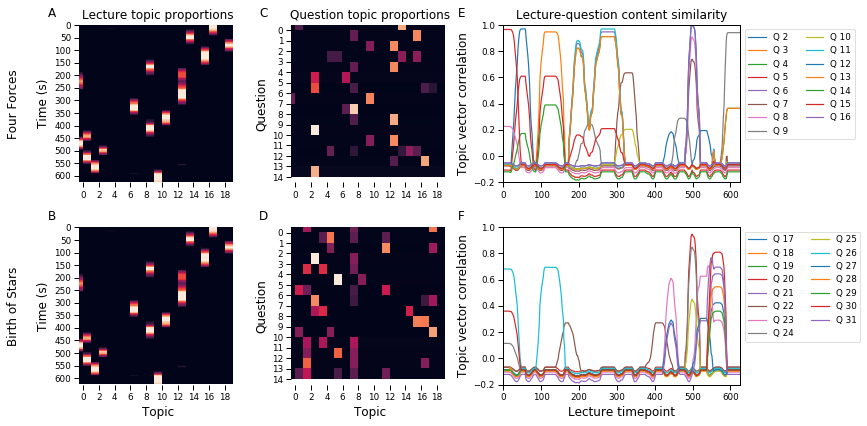

In [4]:
fig, axarr = plt.subplots(2, 3, gridspec_kw={'width_ratios': [1, 1, 1.5]})
fig.set_size_inches(12, 6)
((a, c, e), (b, d, f)) = axarr

a = sns.heatmap(ff_lec, vmin=0, vmax=1, xticklabels=2, yticklabels=50, cbar=False, cmap=cmap, ax=a)
a.set_title('Lecture topic proportions', fontsize=12)
a.set_ylabel('Four Forces\n\nTime (s)', fontsize=12)
a.collections[0].remove()
aspect = ff_lec.shape[1] / ff_lec.shape[0]
a.imshow(ff_lec, aspect=aspect, cmap=cmap)
# a.set_xticks(rotation=0)

b = sns.heatmap(bos_lec, vmin=0, vmax=1, xticklabels=2, yticklabels=50, cbar=False, cmap=cmap, ax=b)
# b.set_title('Lecture topic proportions')
b.set_xlabel('Topic', fontsize=12)
b.set_ylabel('Birth of Stars\n\nTime (s)', fontsize=12)
b.collections[0].remove()
aspect = bos_lec.shape[1] / bos_lec.shape[0]
b.imshow(bos_lec, aspect=aspect, cmap=cmap)

c = sns.heatmap(ff_qs, vmin=0, vmax=1, xticklabels=2, cbar=False, cmap=cmap, ax=c)
c.set_title('Question topic proportions', fontsize=12)
c.set_ylabel('Question', fontsize=12)
c.collections[0].remove()
aspect = ff_qs.shape[1] / ff_qs.shape[0]
c.imshow(ff_qs, aspect=aspect, cmap=cmap)

d = sns.heatmap(bos_qs, vmin=0, vmax=1, xticklabels=2, cbar=False, cmap=cmap, ax=d)
# d.set_title('Questions topic proportions')
d.set_xlabel('Topic', fontsize=12)
d.set_ylabel('Question', fontsize=12)
d.collections[0].remove()
aspect = bos_qs.shape[1] / bos_qs.shape[0]
d.imshow(bos_qs, aspect=aspect, cmap=cmap)


e.plot(1 - cdist(ff_lec, ff_qs, 'correlation'))
e.set_title('Lecture-question content similarity', fontsize=12)
e.set_xlim(0, ff_lec.shape[0])
e.set_ylim(-.2, 1)
e.set_ylabel('Topic vector correlation', fontsize=12)
e.legend(labels=[f'Q {i+1}' for i in range(1, 16)], ncol=2, bbox_to_anchor=(1,1))
e.grid(False)

f.plot(1 - cdist(bos_lec, bos_qs, 'correlation'))
# f.set_title('Lecture-question content similarity')
f.set_xlim(0, bos_lec.shape[0])
f.set_ylim(-.2, 1)
f.set_xlabel('Lecture timepoint', fontsize=12)
f.set_ylabel('Topic vector correlation', fontsize=12)
f.legend(labels=[f'Q {i+1}' for i in range(16, 31)], ncol=2, bbox_to_anchor=(1,1))
f.grid(False)

labels = 'ABCDEF'
for i, ax in enumerate((a, b, c, d, e, f)):
    ax.text(-.175, 1.05, labels[i], horizontalalignment='center', transform=ax.transAxes, fontsize=12)

plt.tight_layout()
# plt.savefig(opj(fig_dir, 'lecture-question-similarity.pdf'), dpi=1000)
plt.show()